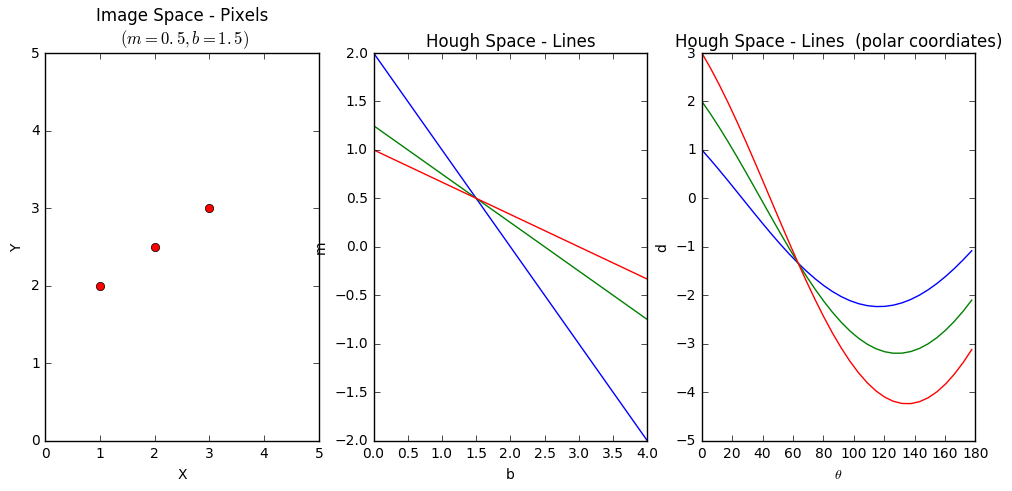

In [2]:
import numpy as np
import matplotlib.pyplot as plt

pixels = [(1.,2.),(2.,2.5),(3.,3.)]

plt.close('all')
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.plot([x for (x,y) in pixels], [y for (x,y) in pixels], 'ro')
axes = plt.gca()
axes.set_ylim([0,5])
axes.set_xlim([0,5])
plt.xlabel('X'), plt.ylabel('Y')
plt.title('Image Space - Pixels\n $(m=0.5,b=1.5)$')

plt.subplot(1,3,2)
b = np.arange(5)

for (x,y) in pixels:
    m = (y-b)/x
    plt.plot(b,m)

axes.set_ylim([0,5])
axes.set_xlim([0,5])
plt.xlabel('b'), plt.ylabel('m')
plt.title('Hough Space - Lines')

plt.subplot(1,3,3)
theta = np.arange(0,np.pi,0.1)
for (x,y) in pixels:
    d = x*np.cos(theta)-y*np.sin(theta)
    plt.plot(np.degrees(theta),d)
    
plt.xlabel('$\\theta$'), plt.ylabel('d')
plt.title('Hough Space - Lines  (polar coordiates)')

plt.show()

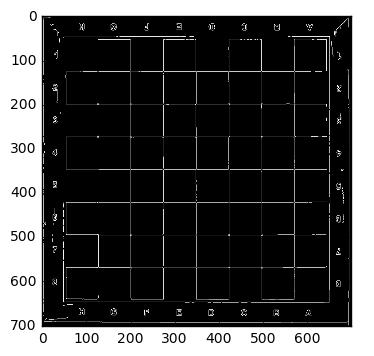

In [5]:
import cv2
img = cv2.imread('images/board.jpg', 0)
h, w = img.shape

edges = cv2.Canny(img,100,200)
plt.imshow(edges, cmap='gray'); plt.show()

In [6]:
H = np.zeros((180,int(np.sqrt(w*w+h*h))+1))
for x in range(w):
    for y in range(h):
        if edges[y,x] == 0:
            continue
            
        for theta in range(0,180):
                d = int(x*np.cos(theta)-y*np.sin(theta))
                H[theta, d] += 1

583.0
25


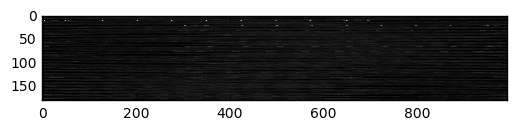

(<matplotlib.image.AxesImage at 0x1229bd2e8>, None)

In [7]:
print (np.max(H))
lines = np.argwhere(H>200)
print (len(lines))
plt.imshow(H,cmap='gray', vmin=0,vmax=255),plt.show()

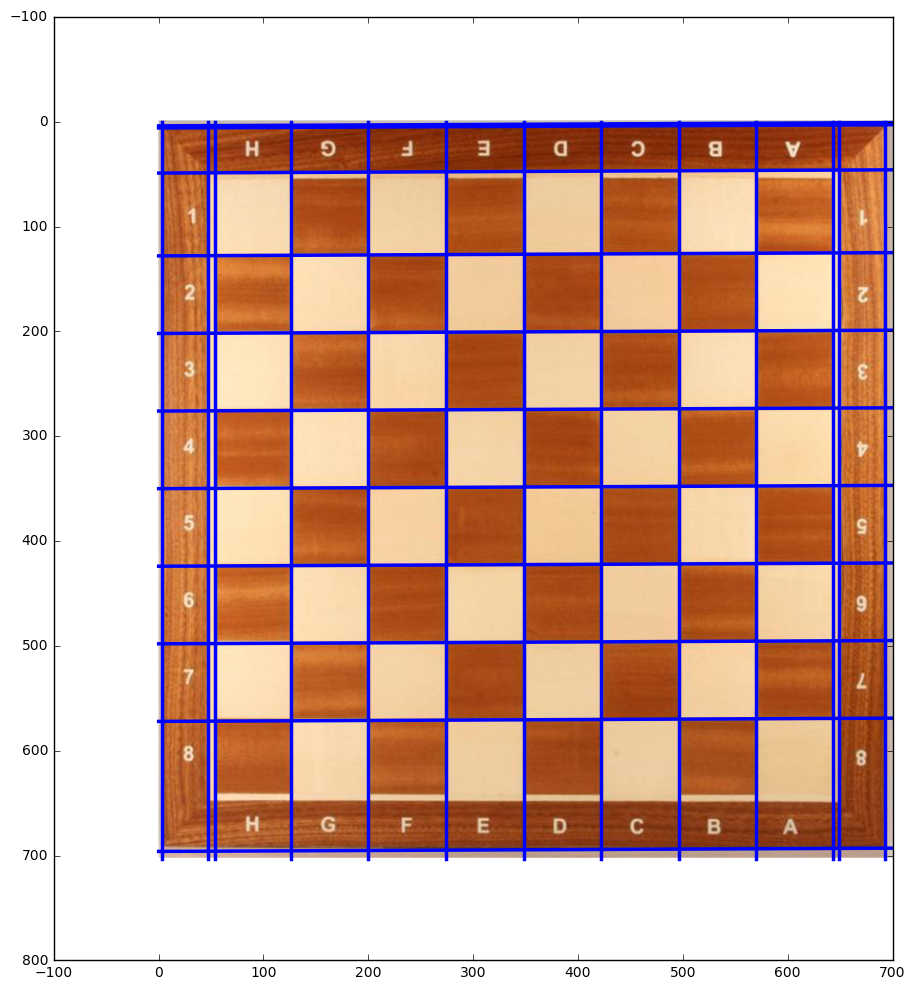

In [8]:
plt.figure(figsize=(10,10))
img = cv2.imread('images/board.jpg')[:,:,::-1]
plt.imshow(img)

axes = plt.gca()
x_vals = np.array([0,w])

for (theta, d) in lines:
    if theta == 0:
        plt.plot([d, d], [0, h],linewidth=2.5, color='b')
    else:
        y_vals = -(1.*d)/np.sin(theta) + x_vals*(np.cos(theta)/np.sin(theta))
        plt.plot(x_vals, y_vals, linewidth=2.5, color='b')
     
plt.tight_layout()
plt.show()

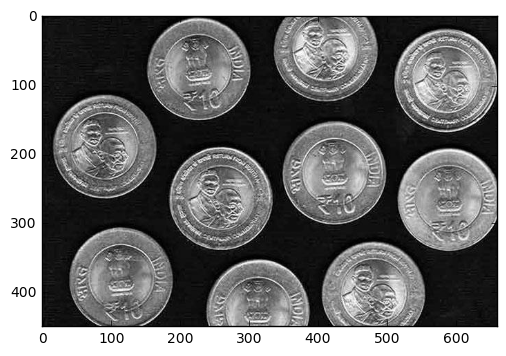

In [11]:
img = cv2.imread('images/coins.jpg', 0)
plt.imshow(img, cmap='gray'); plt.show()

450 660


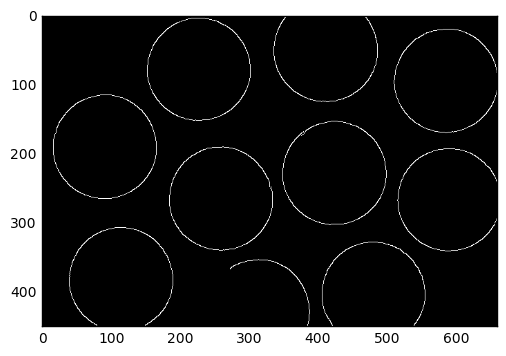

In [13]:
h, w = img.shape
print (h,w)
img = cv2.medianBlur(img,5)

edges = cv2.Canny(img,200,600)
plt.imshow(edges, cmap='gray'); plt.show()

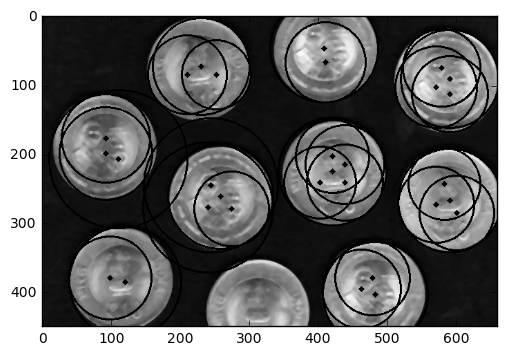

In [14]:
circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,20,
                            param1=200,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(img, cmap='gray')
plt.show()